# Stage Analysis

In this notebook I analyze the time the program takes for each stage of the algorithm.
Here you will find the 3 versions:

1. Sequential
2. Parallel THR (Native C++ Threads)
3. Parallel FF (using Fast Flow Lib)


In [1]:
from b_tools.preprocess import get_standardized_measures

### Sequential (SEQ)

In [2]:
# Choose the file
DATASET=300

In [3]:
seq = get_standardized_measures(f"results/sequential_{DATASET}.csv")

In [4]:
seq.describe()

,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL
count,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.0,1.000000e+00
mean,177837457.0,859130352.0,37981.0,3.136292e+09,1.683770e+10,97886846.0,2.110888e+10
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,177837457.0,859130352.0,37981.0,3.136292e+09,1.683770e+10,97886846.0,2.110888e+10
25%,177837457.0,859130352.0,37981.0,3.136292e+09,1.683770e+10,97886846.0,2.110888e+10
50%,177837457.0,859130352.0,37981.0,3.136292e+09,1.683770e+10,97886846.0,2.110888e+10
75%,177837457.0,859130352.0,37981.0,3.136292e+09,1.683770e+10,97886846.0,2.110888e+10
max,177837457.0,859130352.0,37981.0,3.136292e+09,1.683770e+10,97886846.0,2.110888e+10


In [10]:
TOTAL_SEQ=22166634064
TOTAL_THR=


5402689210

In [5]:
seq_stages = list(seq.columns)
seq_stages.remove('TOTAL')
seq_means = [seq[stage].mean() for stage in seq_stages]

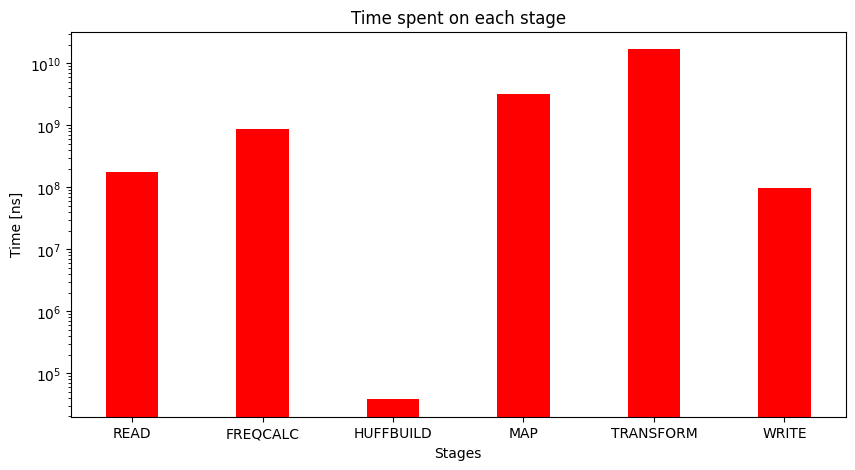

In [6]:
import matplotlib.pyplot as plt 
 
fig = plt.figure(figsize = (10, 5))
plt.bar(seq_stages, seq_means, color='red', width=0.4)
 
plt.xlabel("Stages")
plt.ylabel("Time [ns]")
plt.yscale('log')
plt.title("Time spent on each stage")
plt.show()

## Parallel (THR)

In [9]:
thr = get_standardized_measures(f'results/thr_{DATASET}.csv', excluded_columns=['P_DEGREE'])

In [10]:
def plot_for_p(p_degree, data):
    thr_data = data[data['P_DEGREE'] == p_degree]
    thr_stages = list(thr_data.columns)
    thr_stages.remove('TOTAL')
    thr_stages.remove('P_DEGREE')
    thr_means = [thr_data[stage].mean() for stage in thr_stages]
    fig = plt.figure(figsize = (10, 5))
    plt.bar(thr_stages, thr_means, color='blue', width=0.4)
    plt.xlabel("Stages")
    plt.ylabel("Time [ns]")
    plt.yscale('log')
    plt.title("Time spent on each stage")
    plt.show()

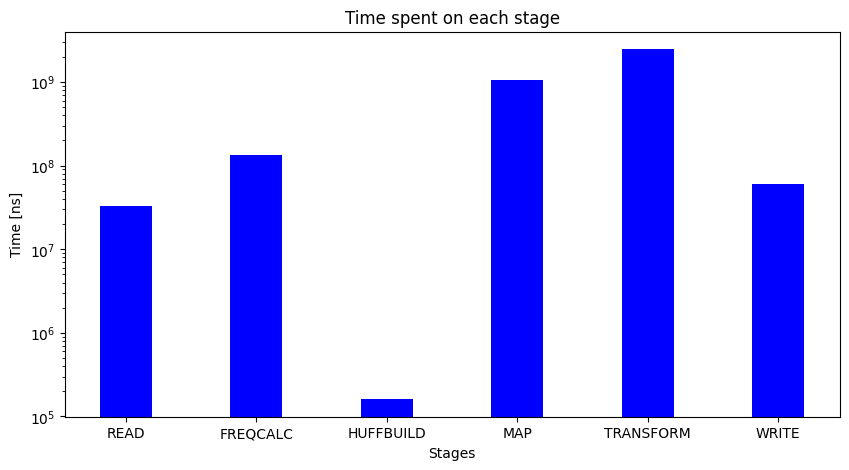

In [11]:
plot_for_p(6, thr)

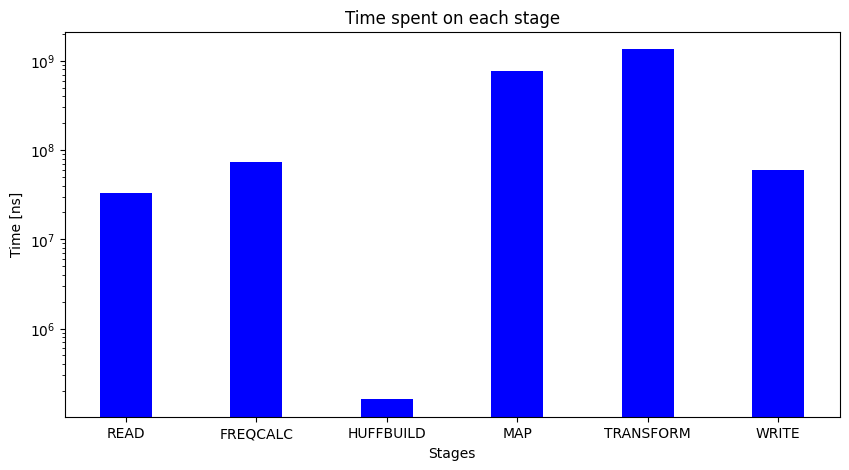

In [12]:
plot_for_p(11, thr)

In [13]:
thr[thr['TOTAL'] == thr['TOTAL'].max()]

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL
2,1,32310648,803158411,157526,4765851633,14481733604,64450066,20147661888
